Adınız:  Umutcan

Soyadınız:  Kemahlı

Okul Numaranız:  2212721050

GitHub Repo Bağlantısı: https://github.com/umutckem/CNN_siniflandirma.git

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
train_dir = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/train"
val_dir   = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/val"
test_dir  = "/content/drive/MyDrive/Dersler/Makine-Ogrenmesi/Odev/Uygulama-1/DataSet/test"

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [141]:
IMG_SIZE = 128
BATCH_SIZE = 64

In [142]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [143]:
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [144]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_data = val_gen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 90 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [145]:
model3 = Sequential()

# Conv Block 1
model3.add(Conv2D(32, (3,3), activation='relu', padding='same',
                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model3.add(MaxPooling2D(2,2))

# Conv Block 2
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))

# Conv Block 3
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D(2,2))

# Regularization
model3.add(Dropout(0.4))

# Fully Connected
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))

# Output
model3.add(Dense(1, activation='sigmoid'))


In [146]:
model3.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model3.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,482,369 (32.36 MB)

 Trainable params: 8,482,369 (32.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Deney No 2 Train Verisi

history3 = model3.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 9s/step - accuracy: 0.3969 - loss: 1.1433 - val_accuracy: 0.5000 - val_loss: 0.6894
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.4926 - loss: 0.7403 - val_accuracy: 0.5000 - val_loss: 0.7689
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.4874 - loss: 0.7609 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.5499 - loss: 0.6734 - val_accuracy: 0.8500 - val_loss: 0.6845
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.5000 - loss: 0.6970 - val_accuracy: 0.5000 - val_loss: 0.6836
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.5749 - loss: 0.6828 - val_accuracy: 0.5000 - val_loss: 0.6804
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.5276 - loss: 0.6863 - val_accuracy: 0.5000 - val_loss: 0.6745
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.4986 - loss: 0.6843 - val_accuracy: 0.9000 - val_loss: 0.6677
Epoch 9/10
2/2 

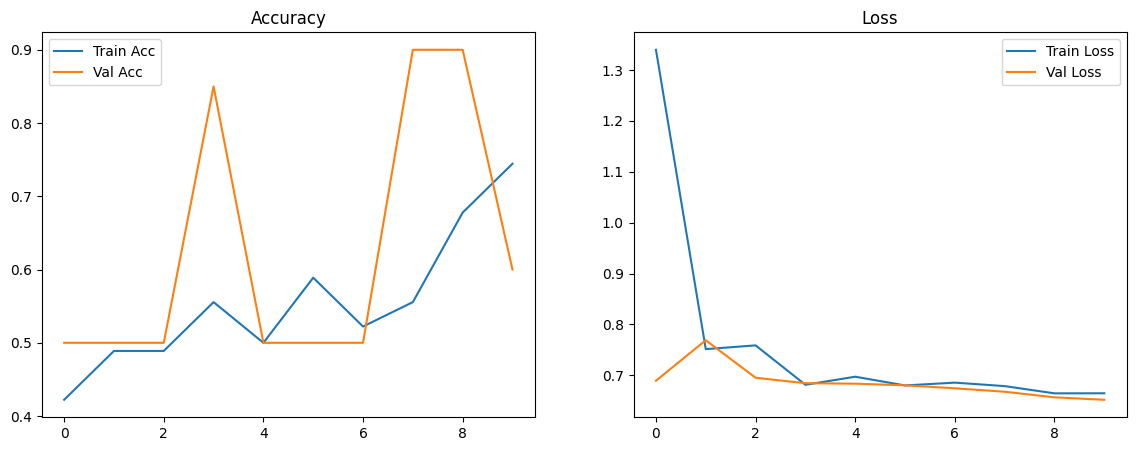

In [23]:
#Deney No 2 Grafikleri

import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history3.history["accuracy"], label="Train Acc")
plt.plot(history3.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history3.history["loss"], label="Train Loss")
plt.plot(history3.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [24]:
#Deney No 2 Sonuçları

test_loss, test_acc = model3.evaluate(test_data)
print("Model-3 Test Accuracy:", test_acc)

pred3 = (model3.predict(test_data) > 0.5).astype("int32")
true3 = test_data.classes

print("Pred:", pred3.reshape(-1))
print("True:", true3)
print("Manual Accuracy:", (pred3.reshape(-1) == true3).mean())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8889 - loss: 0.5963
Model-3 Test Accuracy: 0.8888888955116272
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Pred: [0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1]
True: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Manual Accuracy: 0.8888888888888888


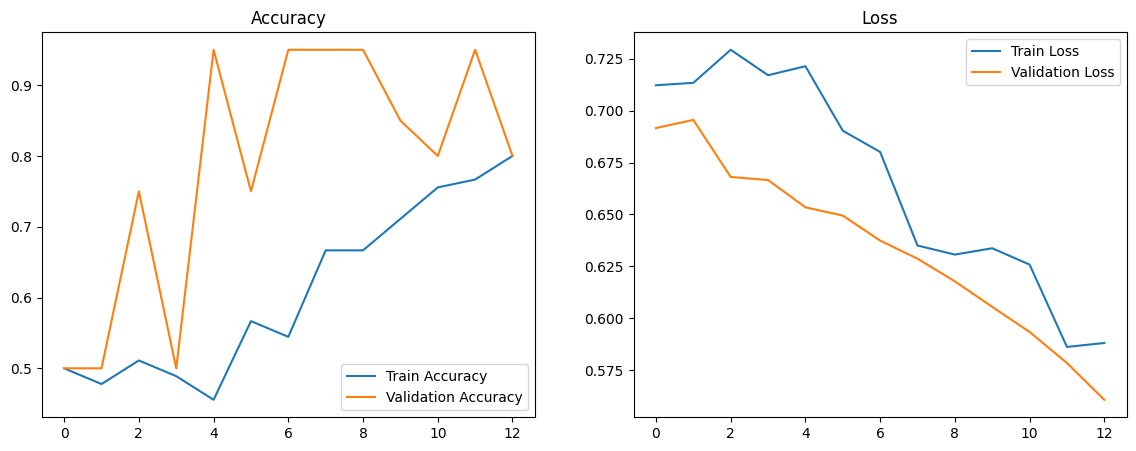

In [62]:
# Deney No 3

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history3.history["accuracy"], label="Train Accuracy")
plt.plot(history3.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history3.history["loss"], label="Train Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [65]:
#Deney No 3

pred3 = (model3.predict(test_data) > 0.5).astype("int32")
true3 = test_data.classes

print("Pred:", pred3.reshape(-1))
print("True:", true3)
print("Manual Accuracy:", (pred3.reshape(-1) == true3).mean())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Pred: [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
True: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Manual Accuracy: 0.6666666666666666


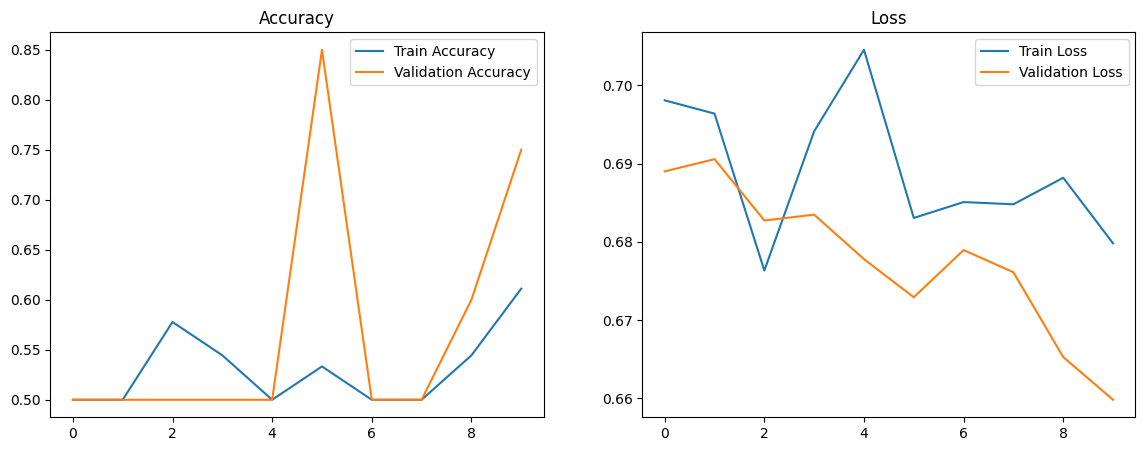

In [111]:
# Deney No 5

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history3.history["accuracy"], label="Train Accuracy")
plt.plot(history3.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history3.history["loss"], label="Train Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [103]:
# Deney No 5

pred3 = (model3.predict(test_data) > 0.5).astype("int32")
true3 = test_data.classes

print("Pred:", pred3.reshape(-1))
print("True:", true3)
print("Manual Accuracy:", (pred3.reshape(-1) == true3).mean())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1]
True: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Manual Accuracy: 0.7692307692307693


In [147]:
#Deney no 7

history3 = model3.fit(
    train_data,
    epochs=15,
    validation_data=val_data
)


Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 6s/step - accuracy: 0.4830 - loss: 1.2777 - val_accuracy: 0.5000 - val_loss: 0.7600
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.4670 - loss: 0.9046 - val_accuracy: 0.5000 - val_loss: 0.8511
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.4798 - loss: 0.7698 - val_accuracy: 0.9000 - val_loss: 0.6855
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5675 - loss: 0.6774 - val_accuracy: 0.5000 - val_loss: 0.7003
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.4487 - loss: 0.7186 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5252 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6790
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.5558 - loss: 0.6907 - val_accuracy: 0.6000 - val_loss: 0.6765
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 6s/step - accuracy: 0.6544 - loss: 0.6744 - val_accuracy: 0.5000 - val_loss: 0.6753
Epoch 9/15
2/2 

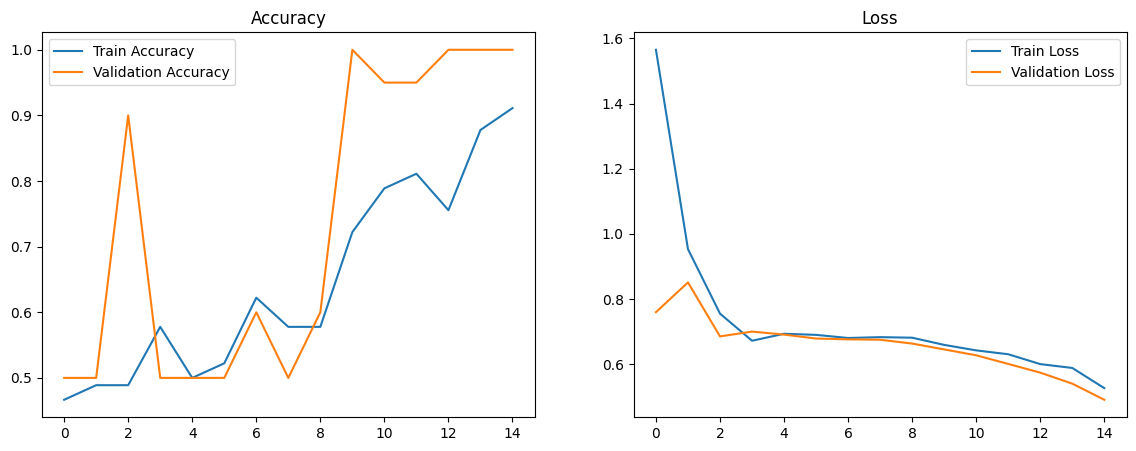

In [148]:
#Deney no 7

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history3.history["accuracy"], label="Train Accuracy")
plt.plot(history3.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history3.history["loss"], label="Train Loss")
plt.plot(history3.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [149]:
#Deney no 7

test_loss, test_acc = model3.evaluate(test_data)
print("Test Accuracy:", test_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9615 - loss: 0.3460
Test Accuracy: 0.9615384340286255


In [150]:
#Deney no 7

pred3 = (model3.predict(test_data) > 0.5).astype("int32")
true3 = test_data.classes

print("Pred:", pred3.reshape(-1))
print("True:", true3)
print("Manual Accuracy:", (pred3.reshape(-1) == true3).mean())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1]
True: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
Manual Accuracy: 0.9615384615384616


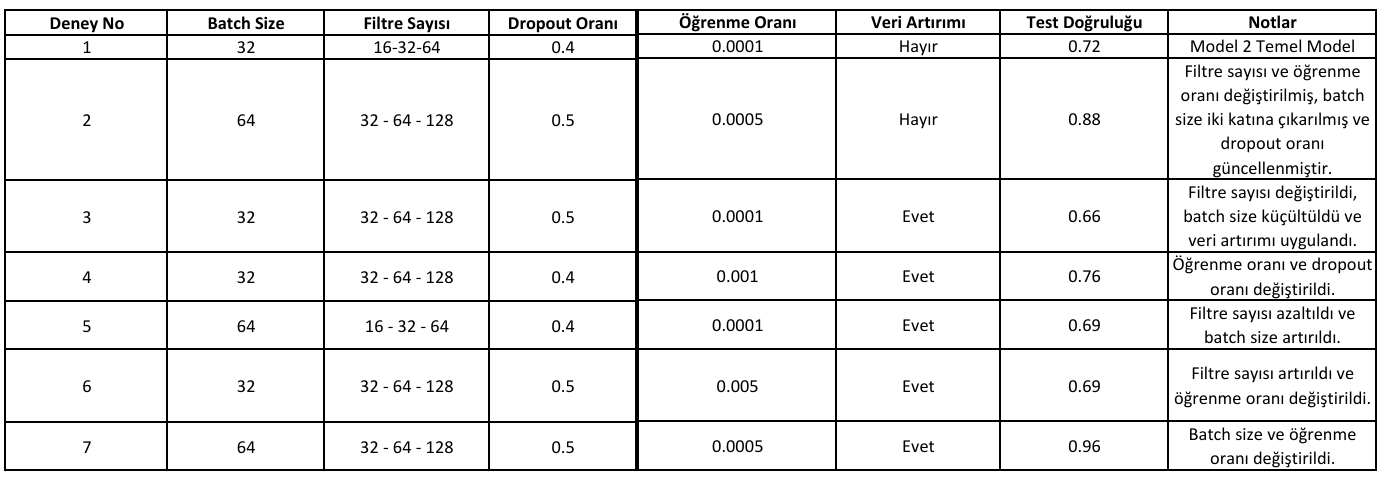